<a href="https://colab.research.google.com/github/Zernach/DS-Unit-2-Applied-Modeling/blob/master/245(B)_ZERNACH_%E2%80%94_Unit_2(B)_Portfolio_Project_(November_22nd%2C_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2B Portfolio Project

UNIT 2B PORTFOLIO PROJECT COMPLETED BY: [RYAN ZERNACH](http://ryan.zernach.com/portfolio/)

![alt text](http://www.zernach.com/wp-content/uploads/2019/09/Ryan-Zernach-Logo-1-e1568499634499.png)

### Air Flights Datasets Courtesy of Department of Transportation's [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Tables.asp?DB_ID=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29&DB_Short_Name=Origin%20and%20Destination%20Survey) (once link is clicked, select "DB1BMarket") — Data is from 2018 flights in Q1, Q2, Q3, and Q4 that originate somewhere in the USA and have a. destination of somewhere in the USA (USA includes Alaska, Hawaii, and US territories)

# PART 0 — I had to do a bunch of data cleaning/wrangling to slim and refine my dataset from 27,000,000+ rows and 42 columns down to 8,000,000 rows and 10 columns. After cleaning and wrangling, I exported the files as CSV's and then uploaded the cleaned data in Part 1 (which is why Part 0 is commented out, but I still wanted to show all my work).

### 0.1) The data files were downloaded from the Department of Transportation and were then stored in my Google Drive. So the following lines of code request an authentication code from Google Drive, grant permissions, and package the Q1, Q2, Q3, and Q4 csv files into a format that's transferrable from Google Drive to Pandas dataframes. Then, do a bunch of cleaning/wrangling/refining and bundle them altogether into a single 2018 flights dataset.

In [39]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd

# Requests an authentication code, which is received by clicking the unique link
# that it provides when this code cell is run...
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Searches for all files that contain "Air Flight Information" and are within
# the Google Drive Folder with the long, seemingly-random extension shown in orange
listed = drive.ListFile({'q': "title contains 'Flights' and '1yEHzS1W5Z413DFrlE0aZvvARRzHFXzJb' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title q3_q4 Flights .csv, id 1N1A_i7UGb-mhLNkA1m7FVyKCJKR2ruVQ
title q1_q2 Flights .csv, id 1Vuc4Dwd-1PnYZ_iFcJ2svG8ikBwDDbtj


In [40]:
# Honestly haven't looked into what the following (5) lines do, but they magically make it work. Run it.
download_path = os.path.expanduser('~/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

# Using the 'title' and 'id' shown in the output two cells above, copy/paste
# that information into the following:

# Q1 Flights
#output_file_q1 = os.path.join(download_path, 'Air Flight Information (2018, Q1).csv')
#temp_file_q1 = drive.CreateFile({'id': '1SaeyCJYVLJEFhLbC4KYruMpnPgrm374v'})
#temp_file_q1.GetContentFile(output_file_q1)

# Q2 Flights
#output_file_q2 = os.path.join(download_path, 'Air Flight Information (2018, Q2).csv')
#temp_file_q2 = drive.CreateFile({'id': '1HHiazRI4c9ifgdKmESwEQdMBg6U5s_MB'})
#temp_file_q2.GetContentFile(output_file_q2)

# Q3 Flights
#output_file_q3 = os.path.join(download_path, 'Air Flight Information (2018, Q3).csv')
#temp_file_q3 = drive.CreateFile({'id': '1jys2LPb0MSNrkeYdio-l-qr3-oMLNKoT'})
#temp_file_q3.GetContentFile(output_file_q3)

# Q4 Flights
#output_file_q4 = os.path.join(download_path, 'Air Flight Information (2018, Q4).csv')
#temp_file_q4 = drive.CreateFile({'id': '1TJc8oh9t5Z0wzT4PN2JAxlBizwdFy1QI'})
#temp_file_q4.GetContentFile(output_file_q4)

# Q1 & Q2 Cleaned Flights
output_file_q_1_2 = os.path.join(download_path, 'q1_q2 Flights .csv')
temp_file_q_1_2 = drive.CreateFile({'id': '1Vuc4Dwd-1PnYZ_iFcJ2svG8ikBwDDbtj'})
temp_file_q_1_2.GetContentFile(output_file_q_1_2)

# Q3 & Q4 Cleaned Flights
output_file_q_3_4 = os.path.join(download_path, 'q3_q4 Flights .csv')
temp_file_q_3_4 = drive.CreateFile({'id': '1N1A_i7UGb-mhLNkA1m7FVyKCJKR2ruVQ'})
temp_file_q_3_4.GetContentFile(output_file_q_3_4)

flights = pd.concat([pd.read_csv(output_file_q_1_2), pd.read_csv(output_file_q_3_4)])
flights = flights.reset_index(drop=True)
flights

,Unnamed: 0,Quarter,Origin,OriginWac,Dest,DestWac,TkCarrier,Passengers,MktFare,MktMilesFlown,MktGeoType
0,0,1,PHL,23,LAX,91,AA,1.0,672.87,2402.0,2
1,2,1,PHL,23,LAX,91,AA,1.0,367.68,2402.0,2
2,4,1,PHL,23,LAX,91,AA,1.0,417.94,2402.0,2
3,79,1,PHL,23,LAX,91,AA,1.0,247.10,2402.0,2
4,81,1,PHL,23,LAX,91,AA,1.0,276.35,2402.0,2
...,...,...,...,...,...,...,...,...,...,...,...
9534412,7176132,4,STL,64,AUS,74,WN,1.0,310.10,721.0,2
9534413,7176145,4,BNA,54,MCI,64,WN,1.0,106.17,491.0,2
9534414,7176177,4,BOS,13,LIT,71,WN,1.0,161.19,1260.0,2
9534415,7176179,4,BOS,13,LIT,71,WN,1.0,170.87,1260.0,2


In [41]:
flights = flights.drop(['Unnamed: 0'], axis=1)

flights['Miles'] = flights['MktMilesFlown']
flights = flights.drop(['MktMilesFlown'], axis=1)

flights['ContiguousUSA'] = flights['MktGeoType']
flights = flights.drop(['MktGeoType'], axis=1)

flights['NumTicketsOrdered'] = flights['Passengers']
flights = flights.drop(['Passengers'], axis=1)

flights['AirlineCompany'] = flights['TkCarrier']
flights = flights.drop(['TkCarrier'], axis=1)

flights['PricePerTicket'] = flights['MktFare']
flights = flights.drop(['MktFare'], axis=1)

flights

,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35
...,...,...,...,...,...,...,...,...,...,...
9534412,4,STL,64,AUS,74,721.0,2,1.0,WN,310.10
9534413,4,BNA,54,MCI,64,491.0,2,1.0,WN,106.17
9534414,4,BOS,13,LIT,71,1260.0,2,1.0,WN,161.19
9534415,4,BOS,13,LIT,71,1260.0,2,1.0,WN,170.87


In [46]:
flights.isnull().sum()

Quarter              0
Origin               0
OriginWac            0
Dest                 0
DestWac              0
Miles                0
ContiguousUSA        0
NumTicketsOrdered    0
AirlineCompany       0
PricePerTicket       0
dtype: int64

# PART 1 — Setup the data for exploratory analytics, data cleaning, and data refining.

### 1.2) Do some data cleaning by refining the data that's used for predictive modeling.

In [0]:
# Drop the unnecessary/duplicate columns
#unnecessary_columns = ['ItinID', 'MktID', 'MktCoupons', 'Year', 'OriginAirportID',
#                       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCountry',
#                       'OriginStateFips', 'OriginState', 'OriginStateName',
#                       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 
#                       'DestCountry', 'DestStateFips', 'DestState', 'DestStateName', 
#                       'AirportGroup', 'WacGroup', 'TkCarrierGroup', 'OpCarrierGroup',
#                       'MktDistanceGroup', 'ItinGeoType', 'Unnamed: 41']
#flights = flights.drop(unnecessary_columns, axis=1)

# Use only the data where customer did not switch carrier, then drop the column
#flights = flights[flights['TkCarrierChange'] == 0]
#flights = flights.drop(['TkCarrierChange'], axis=1)

# Use only the data where customer did not switch operating company, then drop the column
#flights = flights[flights['OpCarrierChange'] == 0]
#flights = flights.drop(['OpCarrierChange'], axis=1)

# Use only the data where customer experience didn't change from one company to another, then drop two columns
#flights = flights[(flights['RPCarrier'] == flights['TkCarrier']) & (flights['RPCarrier'] == flights['OpCarrier'])]
#flights = flights.drop(['RPCarrier', 'OpCarrier'], axis=1)

# Use only the data where # miles flown is equal to # nonstop miles then drop one
#flights = flights[flights['MktMilesFlown'] == flights['NonStopMiles']]
#flights = flights.drop(['NonStopMiles'], axis=1)

# Use only the data where distance equals miles, then drop one of the columns
#flights = flights[(flights['MktDistance'] == flights['MktMilesFlown'])]
#flights = flights.drop(['MktDistance'], axis=1)

# Eliminate the upper-bound outlier prices and the ultra-cheap discounted coupon prices
#flights = flights[(flights['MktFare'] >= 50) & (flights['MktFare'] <= 1000)]

# Eliminate the airlines that have been reduced to just a few tickets sold due to the above refinement processflights
#flights = flights[(flights['TkCarrier'] != 'QX') & (flights['TkCarrier'] != 'OO') & (flights['TkCarrier'] != 'EV')]

# Drop the BulkFare column because it has no variety after all the above refining
#flights = flights.drop(['BulkFare'], axis=1)

# Refine the dataset so the user cannot select more than 20 passengers for their purchase
#flights = flights[flights['Passengers'] <= 20]

#flights.to_csv('q1_q2 Flights .csv')
#flights.to_csv('q3_q4 Flights .csv')
#flights.to_csv('Cleaned_2018_Flights.csv')

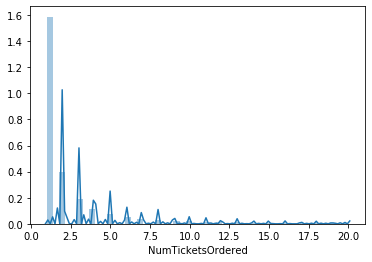

In [15]:
import seaborn as sns
target = flights['NumTicketsOrdered']
sns.distplot(target)

In [23]:
flights['AirlineCompany'].value_counts()

WN    2341253
DL    1771439
AA    1461018
UA    1415862
B6     716111
AS     622855
G4     384958
NK     350719
F9     253548
HA     123449
SY      63406
VX      29799
Name: AirlineCompany, dtype: int64

The (12) Remaining Airline Companies After Data Refinement:
* WN --	Southwest Airlines Co.
* DL --	Delta Air Lines Inc.
* AA --	American Airlines Inc.
* UA --	United Air Lines Inc.
* B6 --	JetBlue Airways
* AS --	Alaska Airlines Inc.
* NK --	Spirit Air Lines
* G4 --	Allegiant Air
* F9 --	Frontier Airlines Inc.
* HA --	Hawaiian Airlines Inc.
* SY --	Sun Country Airlines d/b/a MN Airlines
* VX --	Virgin America



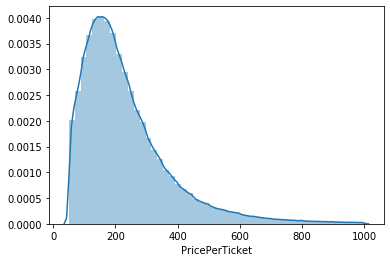

In [25]:
import seaborn as sns
y = flights['PricePerTicket']
sns.distplot(y)

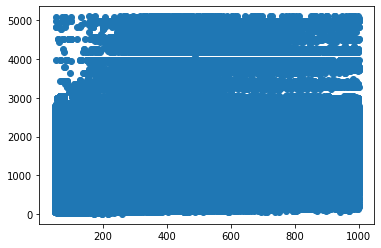

In [26]:
import matplotlib.pyplot as plt
plt.scatter(flights['PricePerTicket'], flights['Miles'])

# PART 2 -- Split the data, fit predictive models, and validate the model's r^2 score.

In [42]:
!pip install category_encoders

In [43]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(flights, train_size = 0.70, test_size = 0.30, random_state=42)

train, val = train_test_split(train, train_size = 0.50, test_size = 0.50, random_state=42)

train.shape, val.shape, test.shape

((3337045, 10), (3337046, 10), (2860326, 10))

In [0]:
target = ['PricePerTicket']
features = flights.columns.drop(target)

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

encoder = TargetEncoder()
x_train = encoder.fit_transform(x_train, y_train)
x_val = encoder.fit_transform(x_val, y_val)
x_test = encoder.fit_transform(x_test, y_test)

model = RandomForestRegressor(n_estimators=7, random_state=42, n_jobs=-1)

model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [46]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_val)
print('RandomForest R^2 Score = ', r2_score(y_val, y_pred))

RandomForest R^2 Score =  0.30862881464022407


# PART 3 — Feature importances & permutation importances.
Global model explanation: all features in relation to each other

#### 3.1) Feature Importances visualization(s)

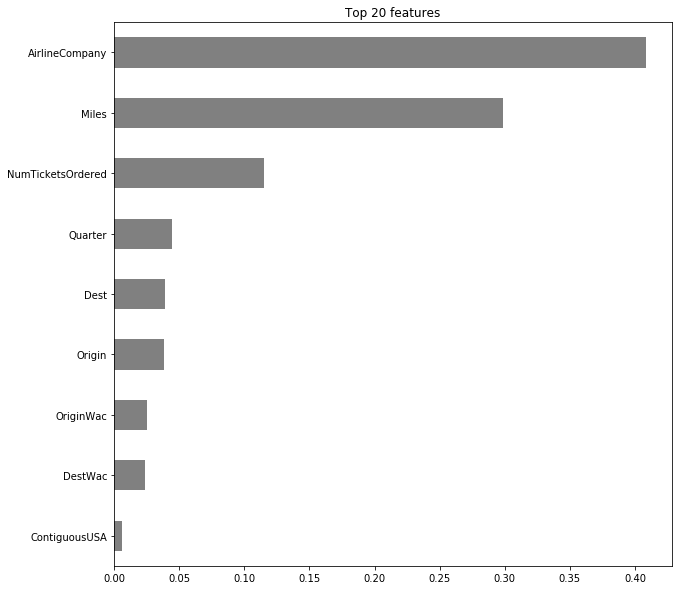

In [10]:
# Get feature importances
#rf = pipeline.named_steps['randomforestregressor']
#importances = pd.Series(rf.feature_importances_, features)
importances = pd.Series(model.feature_importances_, features)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

### 3.2) Permutation Importances -- am I not able to evaluate permutation importances if my target is continuous (as opposed to classification)?????

In [47]:
!pip install eli5

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='neg_mean_absolute_error', 
    n_iter=5, 
    random_state=42
)

permuter.fit(x_val, y_val)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=7, n_jobs=-1,
                                                      oob_score=False,
                                                      rando

In [13]:
feature_names = x_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
18.7248 ± 0.0697,AirlineCompany
13.6533 ± 0.0339,Miles
5.6185 ± 0.0221,NumTicketsOrdered
3.1093 ± 0.0123,OriginWac
2.7112 ± 0.0151,DestWac
2.7079 ± 0.0135,Origin
2.4585 ± 0.0169,Dest
1.1845 ± 0.0179,Quarter
0.1615 ± 0.0056,ContiguousUSA


# PART 4 -- Partial Dependence Plots
Global model explanation: individual feature(s) in relation to target

In [48]:
!pip install pdpbox

In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

feature1 = 'AirlineCompany'

isolated = pdp_isolate(
    model=model, 
    dataset=x_val, 
    model_features=x_val.columns, 
    feature=feature1
)

In [52]:
type(x_val)

pandas.core.frame.DataFrame

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


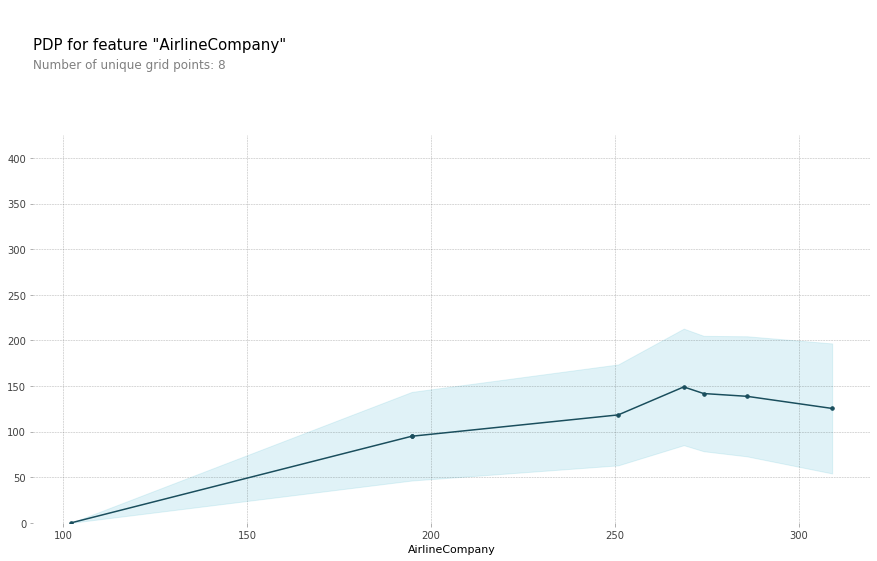

In [50]:
pdp_plot(isolated, feature_name=feature1);

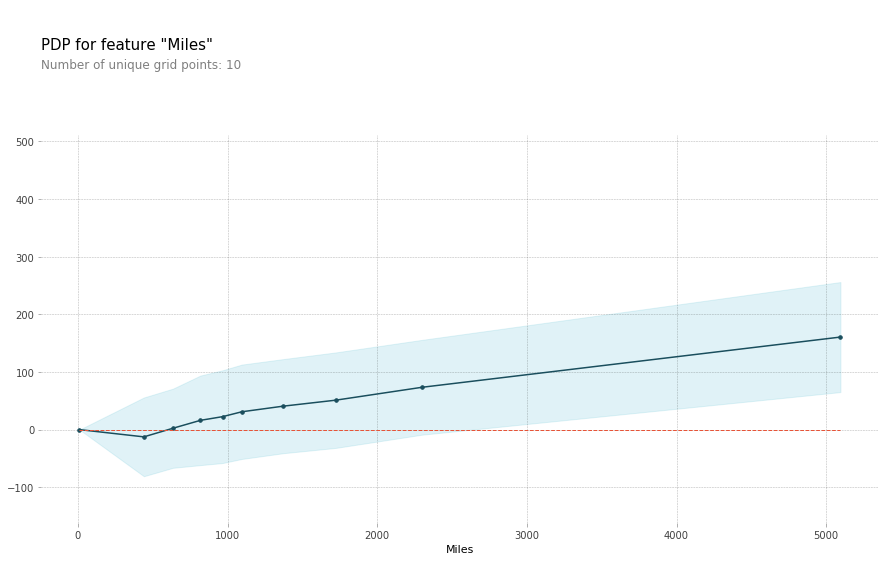

In [44]:
feature2 = 'Miles'

isolated2 = pdp_isolate(
    model=model, 
    dataset=x_val, 
    model_features=x_val.columns, 
    feature=feature2
)

pdp_plot(isolated2, feature_name=feature2);

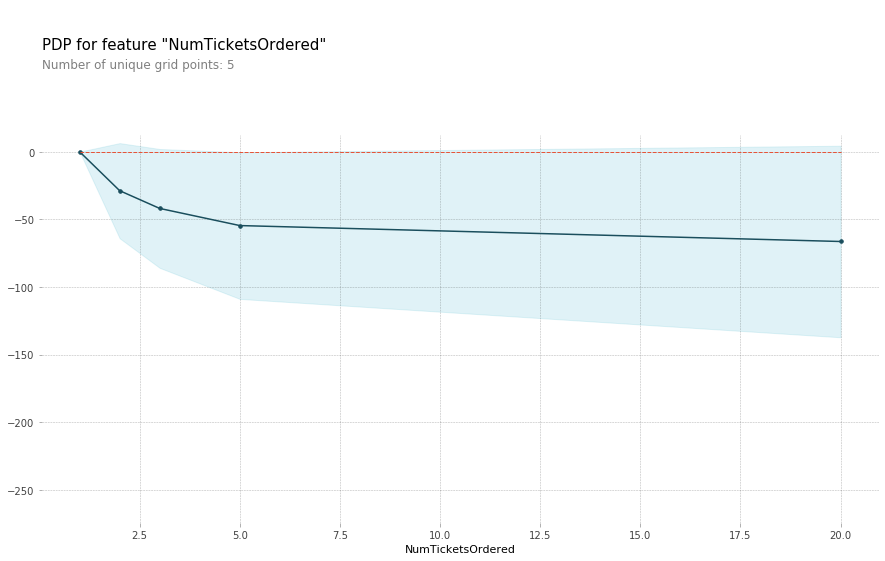

In [51]:
feature3 = 'NumTicketsOrdered'

isolated3 = pdp_isolate(
    model=model, 
    dataset=x_val, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated3, feature_name=feature3);

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f76f91ec518>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f76f5edab00>})

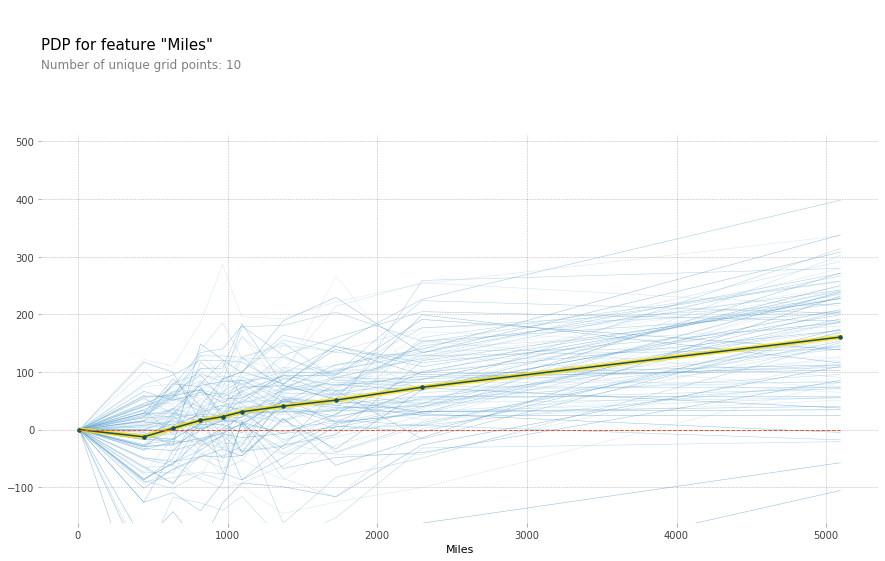

In [52]:
pdp_plot(isolated2, feature_name=feature2, plot_lines=True, frac_to_plot=100)

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


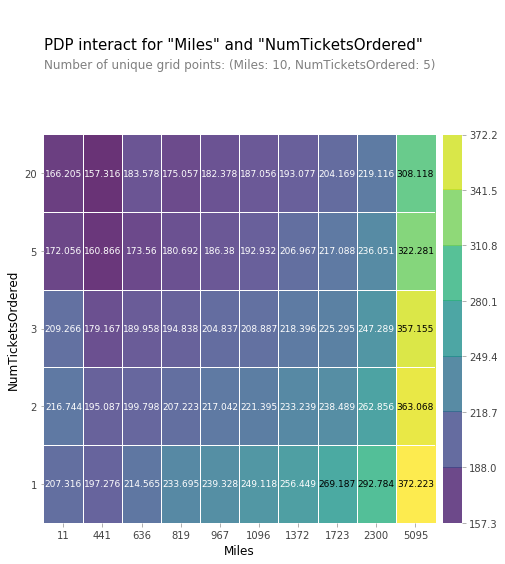

In [11]:
eval_features = ['Miles', 'NumTicketsOrdered']

interaction = pdp_interact(
    model=model, 
    dataset=x_val, 
    model_features=x_val.columns, 
    features=eval_features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=eval_features);

In [14]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)

import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title='PricePerTicket')
    )
)

fig = go.Figure(surface, layout)
fig.show()

# PART 5 -- Shapley Values & Visualizations
Individual prediction explanation:
"Why did the model predict this for that instance?"

In [19]:
!pip install shap

     |████████████████████████████████| 266kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376804 sha256=cba62ca776d9e81eeb7f2eac94b0799fbd6da053fa412013c65622dccf20e952
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


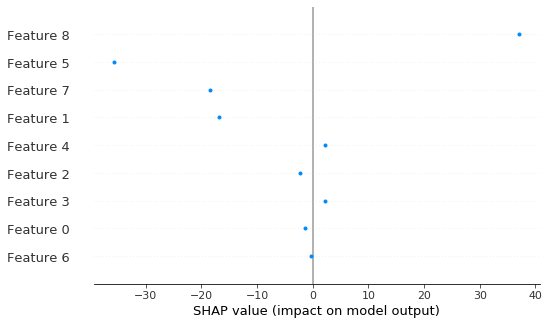

In [38]:
import shap
from shap import summary_plot

shap.summary_plot(shap_values, features=None, feature_names=None, max_display=None, plot_type=None, color=None, axis_color='#333333', title=None, alpha=1, show=True, sort=True, color_bar=True, plot_size='auto', layered_violin_max_num_bins=20, class_names=None, color_bar_label='Feature value', auto_size_plot=None)

In [16]:
row1 = x_val.iloc[[0]]
row1

,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany
2246203,3,226.29815,91,179.646672,83,437.0,2,1.0,194.833898


In [21]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row1)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row1
)

In [31]:
row1262616 = x_val.iloc[[1262615]]
row1262616

,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany
2466002,4,212.828543,54,241.760095,63,695.0,2,2.0,268.789539


In [32]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row1262616)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row1262616
)

In [34]:
def predict(Quarter, Origin, OriginWac, Dest, DestWac, Miles, ContiguousUSA, NumTicketsOrdered, AirlineCompany):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[Quarter, Origin, OriginWac, Dest, DestWac, Miles, ContiguousUSA, NumTicketsOrdered, AirlineCompany]], 
        columns=['Quarter', 'Origin', 'OriginWac', 'Dest', 'DestWac', 'Miles', 'ContiguousUSA', 'NumTicketsOrdered', 'AirlineCompany']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated price for per plane ticket. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value:,.0f} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

predict(4, 212.828543, 54	, 241.760095, 63, 695.0, 2, 2.0, 268.789539)

$199 estimated price for per plane ticket. 

Starting from baseline of $232 
(Quarter, 4.0)                  -1.415765
(Origin, 212.828543)           -16.866545
(OriginWac, 54.0)               -2.216773
(Dest, 241.760095)               2.136374
(DestWac, 63.0)                  2.263765
(Miles, 695.0)                 -35.613008
(ContiguousUSA, 2.0)            -0.242438
(NumTicketsOrdered, 2.0)       -18.435616
(AirlineCompany, 268.789539)    36.995776
